# **Aim : Create the Decision Tree classifier and visualize it graphically.**

Problem Statement : Prediction using Decision Tree Algorithm. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

Data Source : https://bit.ly/3kXTdox

<h1 style="background-color:DodgerBlue;">Importing Necessary Libraries</h1>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

<h1 style="background-color:MediumSeaGreen;">Reading data from the given CSV file.</h1>

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h1 style="background-color:SlateBlue;">Pre-processing & Using basic functions for gathering information regarding the dataset </h1>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [7]:
#Dropping the Id column as its of no value.

data.drop('Id',axis=1,inplace=True)

In [30]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
data.iloc[75:80]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
78,6.0,2.9,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1


In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
print(X.head())
print()
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

   Species
0        0
1        0
2        0
3        0
4        0


<h1 style="background-color:Chartreuse;">Splitting the dataset using train-test-split </h1>

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

<h1 style="background-color:Cadetblue;">Making Decision tree classification model </h1>

In [17]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

<h1 style="background-color:Khaki;">Prediction using the model created </h1>

In [20]:
y_pred = model.predict(x_test)
y_pred, type(y_pred)

(array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
        2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0], dtype=int64),
 numpy.ndarray)

<h1 style="background-color:Plum;">Evaluation </h1>

In [24]:
#Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [25]:
#Accuracy Score

print('Accuracy score :',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy score : 95.55555555555556


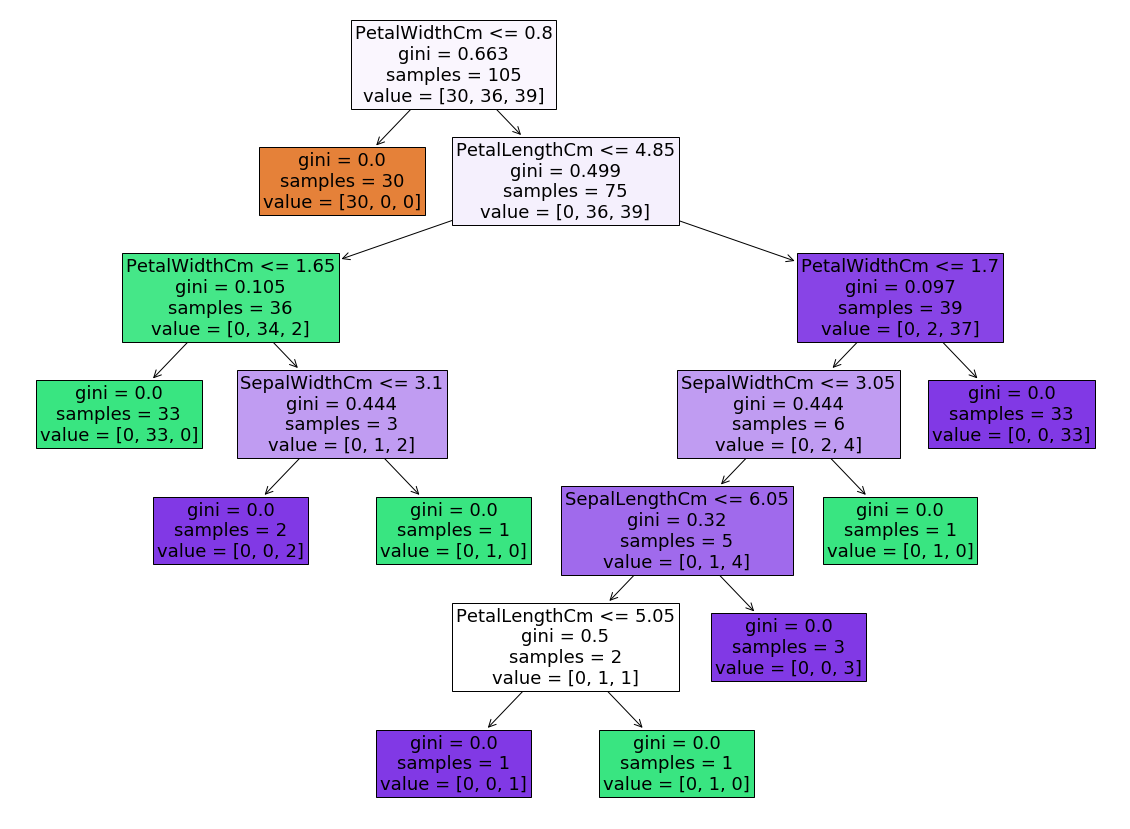

In [28]:
# Visualizing the decision tree model

plt.figure(figsize=(20,15))
model_plot = tree.plot_tree(model,feature_names = X.columns,filled=True,fontsize=18)

<h1 style="background-color:Turquoise;">Predicting the results using custom inputs. </h1>

In [36]:
custom_input =  pd.DataFrame({'SepalLengthCm':[4.2,5.3,6.1,5.6,4.6],
                         'SepalWidthCm':[2.1,2.5,3.2,3.5,4.1],
                         'PetalLengthCm':[1.5,2.5,3.5,3.5,5.5],
                         'PetalWidthCm':[0.4,0.6,2.5,1.5,2.2]})
custom_input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.2,2.1,1.5,0.4
1,5.3,2.5,2.5,0.6
2,6.1,3.2,3.5,2.5
3,5.6,3.5,3.5,1.5
4,4.6,4.1,5.5,2.2


In [37]:
custom_pred = model.predict(custom_input)

custom_input['Predicted_Species'] = custom_pred
custom_input['Predicted_Species'] = custom_input['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
custom_input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.2,2.1,1.5,0.4,Iris-setosa
1,5.3,2.5,2.5,0.6,Iris-setosa
2,6.1,3.2,3.5,2.5,Iris-versicolor
3,5.6,3.5,3.5,1.5,Iris-versicolor
4,4.6,4.1,5.5,2.2,Iris-virginica
